# Integradores de Python

En el notebook anterior implementamos tres integradores, pero en la actualidad casi todos los lenguajes de programación tiene implementados algunos integradores. En este notebook revisaremos uno de los integradores que ya están códificados en Python, por ejemplo `quad`, `dblquad` y `tplquad` además de contar con integradores de sistemas de ODE, por ejemplo `ode` y `odeint` 

In [1]:
from pylab import * # se importa la libreria pylab
from scipy.integrate import * # se importa la libreria scipy.integrate
from numpy import * # se importa numpy
%matplotlib inline

* ¿Qué paquetes tiene la librería `scipy` ?
* En particular `scipy.integrate`

## `quad` 

In [2]:
import scipy.integrate

In [3]:
scipy.integrate?

In [4]:
quad?

Comenzaremos por el primer integrador que se aparece en la documentación de `numpy`, es decir `quad` para ello integremos la siguiente función: $f(x) = \alpha x^2 + \beta$, de $a$ a $b$,es decir, $\displaystyle \int_{a} ^{b} \alpha x^2 + \beta dx $ con $a = 0$ , $b=2$ y $\alpha = 1$ y $\beta = 3$

Definamos $f(x) = \alpha x^2 + \beta$

In [5]:
def f(x,a,b):
    return a*x**2 + b

In [6]:
f(2,1,3)

7

Ahora integremos dicha función con los límites ya mencionados 

In [7]:
quad(f, 0.0, 2.0, (1.0, 3.0,))

(8.666666666666668, 9.621932880084691e-14)

* ¿Qué es la salida del integrador?
* ¿Cuál es la solución analítica de dicha integral?
* ¿El resultado es correcto?

In [8]:
26.0/3.0

8.666666666666666

Ahora integraremos una gaussiana de menos infinito  a infinito, es decir:
$$\displaystyle \int_{-\infty} ^{\infty} \exp(-x^2) dx $$


* Escriba la solución analítica de dicha integral

In [9]:
### Definimos la gaussiana
def g(x):
    return exp(-x**2)

In [10]:
### Integramos dicha función
quad(g, -inf, inf)

(1.7724538509055159, 1.4202636780944923e-08)

* ¿El resultado es correcto?
* grafique la siguiente función $${\displaystyle f(x, \mu ,\sigma ^{2}, \alpha)=\alpha \exp \left({-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}\right)} $$ para distintos valores de $\alpha > 0$, $\mu$ y $\sigma > -1$

* ¿Quá pasa si $\alpha =\dfrac{1}{\sigma \sqrt{2\pi}}$? 
* Integre dicha función de manera analítica y numericamente con `quad` de menos infinito a infinito



## `dblquad` 

Consulte la documentación de `dblquad` e integre de numericamente y analiticamenta los siguiente:

* Vemos que en la documentación se integra $\displaystyle \int_{0}^{1/2} \displaystyle \int_{0}^{1-2y} xy\,dy\,dx = \dfrac{1}{96}$
* $ \displaystyle \int_{-1}^{1} \displaystyle \int_{0}^{1} x^2 + y^2 \,dx \,dy$ 
* $\displaystyle \int_{0}^{1} \displaystyle \int_{0}^{\sqrt{1-x^2}} \sqrt{1-y^2}\,dy\,dx$


In [11]:
dblquad(lambda x, y: x*y, 0, 0.5, lambda x: 0, lambda x: 1-2*x)

(0.010416666666666668, 4.101620128472366e-16)

In [12]:
1.0/96

0.010416666666666666

* Investigue que es `lambda`

## `tplquad` 

Realice lo mismo para`tplquad` e integre de numericamente y analiticamenta las siguientes:

* $ \displaystyle \int_{0}^{1/3} \displaystyle \int_{-1/2}^{0} \displaystyle \int_{0}^{1} (x + 2y + 3z)^2 \,dx \,dy\,dz$ 
* $ \displaystyle \int_{-1}^{1} \displaystyle \int_{-\sqrt{1-x^2}}^{\sqrt{1-x^2}} \displaystyle \int_{-\sqrt{1-x^2-y^2}}^{\sqrt{1-x^2-y^2}}  \,dx \,dy\,dz$ 

## Ode

En `scipy` tenemos dos integradores de ODE, `ode` y `odeint`

* Consulte la documentación de cada uno de estos integradores

In [13]:
?odeint

Comenzaremos por integrar el oscilador armónico, definamos la función `oscilador`

In [15]:
def oscilador(x, t, para):
    return array((x[1],-(para**2)*(x[0]) ))

Integremos el oscilador con `ode`

In [16]:
t = linspace(0,100,1000)

In [17]:
xout = odeint(oscilador, [1.0, 0.0], t, args=(1.0,))

In [18]:
type(xout)

numpy.ndarray

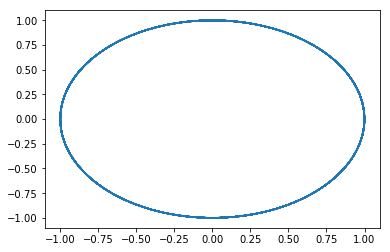

In [19]:
plot(xout[:,0], xout[:,1])

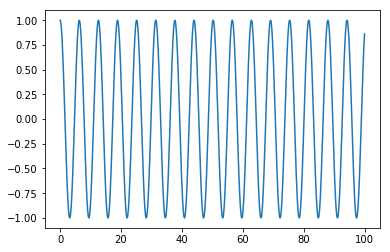

In [20]:
plot(t, xout[:,0])

In [21]:
def energia(x):
    return 0.5*x[:,1]**2 + 0.5*x[:,0]**2 

In [22]:
e=energia(xout)

In [23]:
e

array([ 0.5       ,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.49999998,  0.49999999,  0.5       ,  0.5       ,  0.5       ,
        0.49999999,  0.49999999,  0.49999999,  0.49999999,  0.49999999,
        0.49999999,  0.49999999,  0.49999998,  0.49999998,  0.49999998,
        0.49999998,  0.49999998,  0.49999998,  0.49999997,  0.49999997,
        0.49999997,  0.49999997,  0.49999998,  0.49999998,  0.49999998,
        0.49999999,  0.49999999,  0.49999999,  0.49999999,  0.49999999,
        0.49999999,  0.5       ,  0.5       ,  0.5       ,  0.5       ,
        0.5       ,  0.5       ,  0.50000001,  0.50000001,  0.50000001,
        0.50000001,  0.50000001,  0.50000002,  0.50000002,  0.50000002,
        0.50000002,  0.50000002,  0.50000002,  0.50000003,  0.50000003,
        0.50000003,  0.50000003,  0.50000003,  0.50000004,  0.50000004,
        0.50000004,  0.50000004,  0.50000005,  0.50000005,  0.50000005,
        0.50000005,  0.50000005,  0.50000006,  0.50000006,  0.50

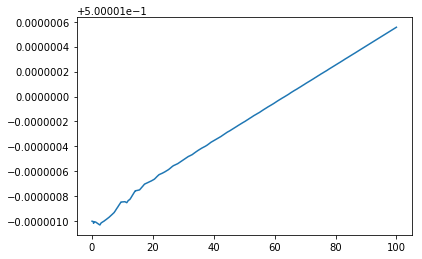

In [24]:
plot(t,e)

In [25]:
import integradores as myint

2.71828182846


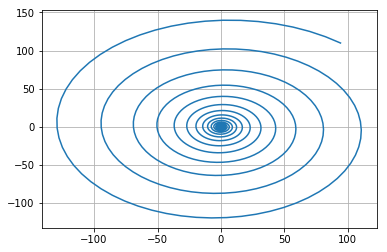

In [48]:
time, out, = myint.metodo_euler(oscilador, 0.0, 100, [1.0, 0.0], 0.1, 1.0)

x = []
v = []
for i in out:
    x.append(i[0])
    v.append(i[1])

plot(x, v)
grid(True)

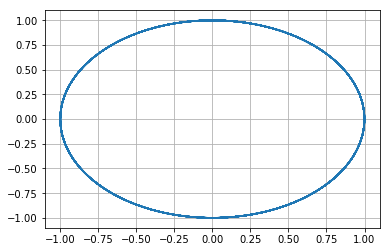

In [49]:
time, out, = myint.rg4(oscilador, 0.0, 100, [1.0, 0.0], 0.1, 1.0)

xr = []
vr = []
for i in out:
    xr.append(i[0])
    vr.append(i[1])

plot(xr, vr)
grid(True)

In [45]:
def energiaee(x,v):
    i=0
    suma = []
    while i < len(x):
        suma.append(0.5*x[i]**2 + 0.5*v[i]**2)
        i +=1
    return suma

In [51]:
er = energiaee(xr, vr) 
ee = energiaee(x, v)

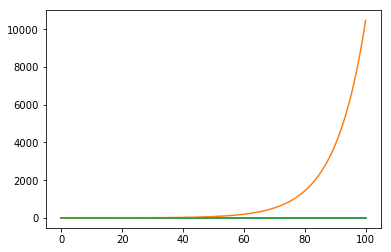

In [54]:
plot(t,e)
plot(time,ee)
plot(time,er)

Ahora integremos el péndulo 

\begin{equation}
 \dfrac{d^2 x(t)}{d t^2} + \dfrac{g}{\ell} \sin(x(t)) = 0
\end{equation}

Cuyo campo vectorial es:

\begin{eqnarray}
v = \dot{x} \\
\dot{v} = -\omega ^2\sin(x)
\end{eqnarray}

In [55]:
array([9,0])

array([9, 0])

In [56]:
def pendulo(x,t,para):
    return array((x[1],-(para**2)*(sin(x[0])) ))

In [57]:
t=linspace(0,10,100)
xpout = odeint(pendulo, [pi/2, 1.0], t, args=(1.0,))

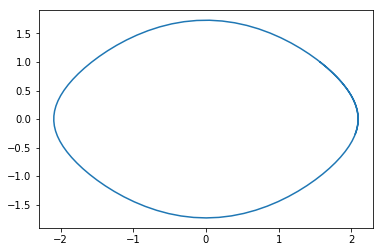

In [58]:
plot(xpout[:,0], xpout[:,1])

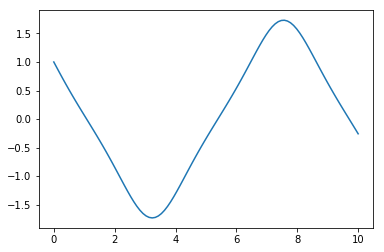

In [59]:
plot(t, xpout[:,1])

In [60]:
def energiapen(x):
    return 0.5*x[:,1]**2 + (1 - cos(x[:,0])) 

In [61]:
ep = energiapen(xpout)

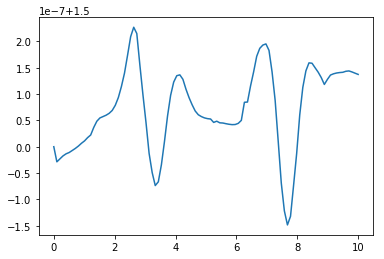

In [62]:
plot(t,ep)

In [63]:
random.uniform(-10, 10)

-0.2064248788941505

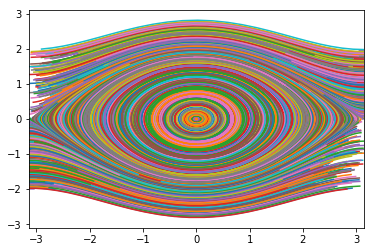

In [64]:
for i in range(3000):
    x=[random.uniform(-pi, pi), random.uniform(-2, 2)]
    xpout = odeint(pendulo, x, t, args=(1.0,))
    plot(xpout[:,0], xpout[:,1])
    xlim(-pi,pi)